# Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

-> Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots

-> 5 ML algo used from sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN

-> As the metrics is common for all classification problems so imported common metrics all at once.

-> (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
wine = pd.read_csv('winequality-red.csv')
df=pd.DataFrame(wine)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

Total rows = 1599 & colums = 12

Creating new pandas Dataframe = df
The Dataset has total 12 Variables where quality is the target or dependent variable
Most of the values of independent variables are continous (float & integer)
scaling can be applied as values of fixed acidity & total sulphur dioxide are not falling in range with rest other independent variables
Target Column quality is scored from 0 to 10 where high value has good quality of the wine.

In [4]:
#data statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The mean is more than median (50th Percentile) in all columns

There is a large difference in 75% percentile and max value in residual sugar,free sulphur dioxide & total sulphur dioxide.

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null or missing values and 11 float vbariables with Target variable(quality) is int variable.

since dataset values are not comlex, box plot is to used for studing further.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

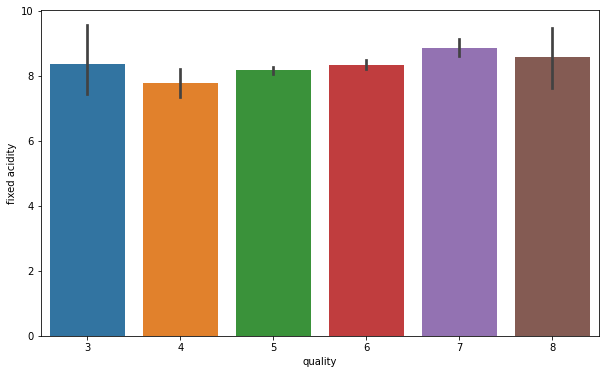

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="fixed acidity", data=wine)

There is no fixed pattern observerd, lets not give much importance.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

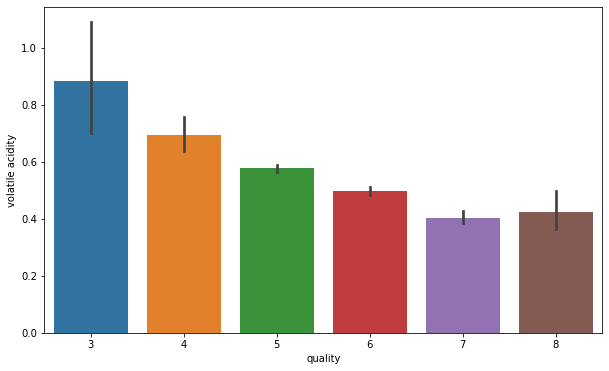

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="volatile acidity", data=wine)

There is downward trend observerd in the above plot.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

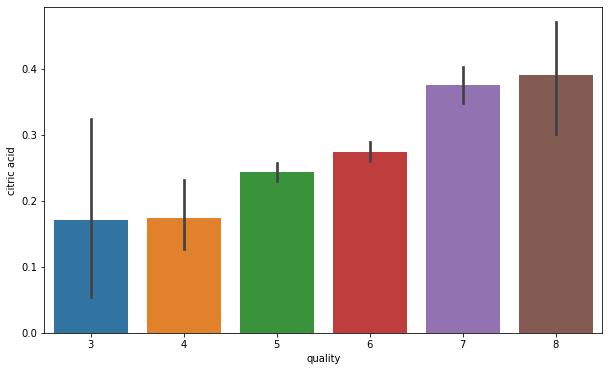

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="citric acid", data=wine)

There is upward trend observerd in the above plot.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

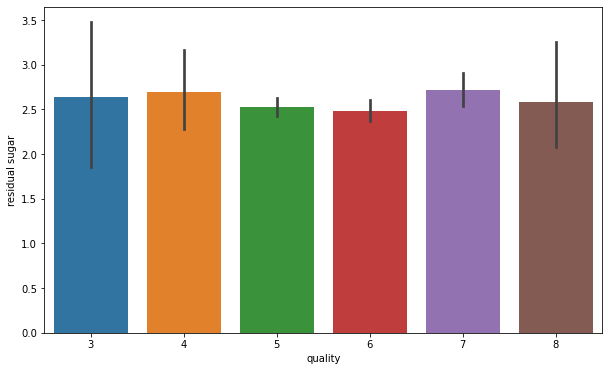

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="residual sugar", data=wine)

There is no fixed pattern observerd, lets not give much importance.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

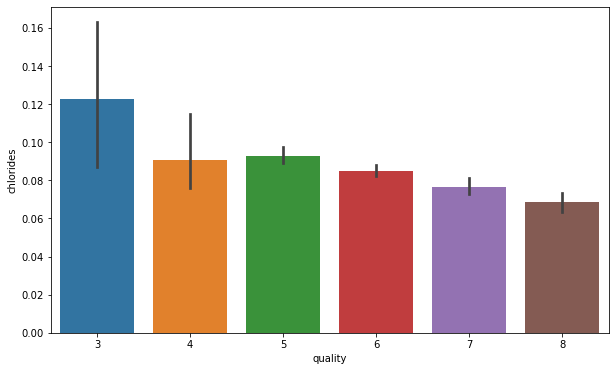

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="chlorides", data=wine)

There is downward trend observerd in the above plot.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

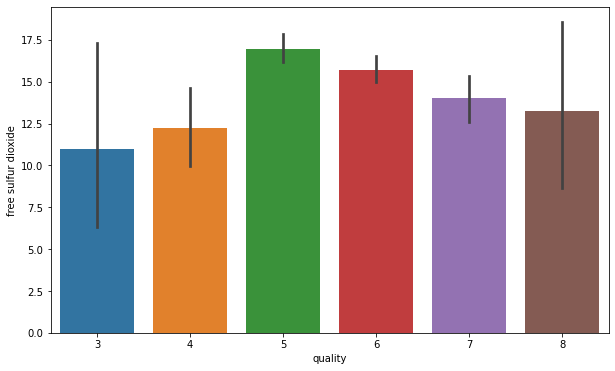

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="free sulfur dioxide", data=wine)

There is no fixed pattern observerd, lets not give much importance.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

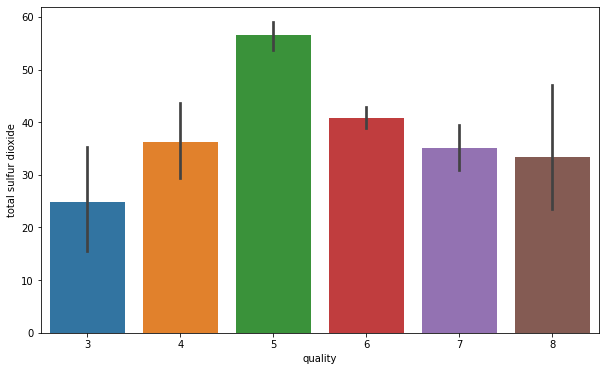

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="total sulfur dioxide", data=wine)

There is no fixed pattern observerd, lets not give much importance.

<AxesSubplot:xlabel='quality', ylabel='density'>

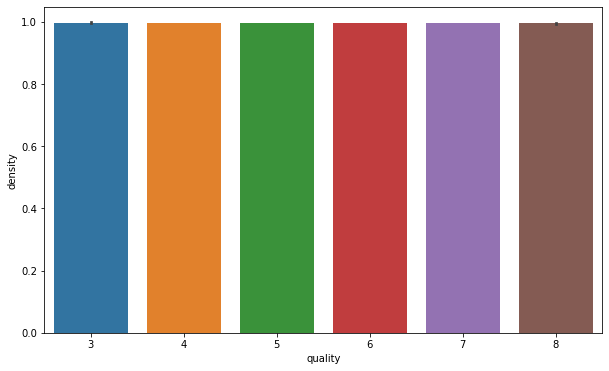

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="density", data=wine)

There is no fixed pattern observerd, lets not give much importance.

<AxesSubplot:xlabel='quality', ylabel='pH'>

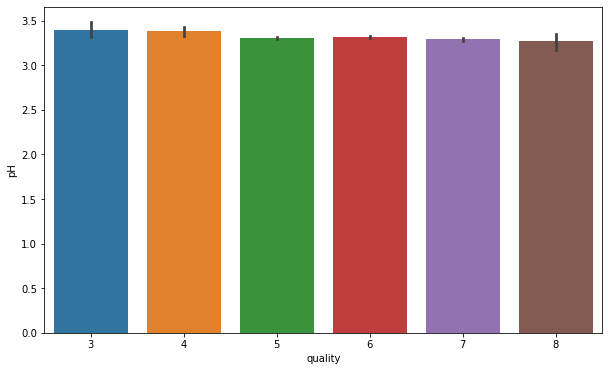

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="pH", data=wine)

There is slight downward trend observerd in the above plot

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

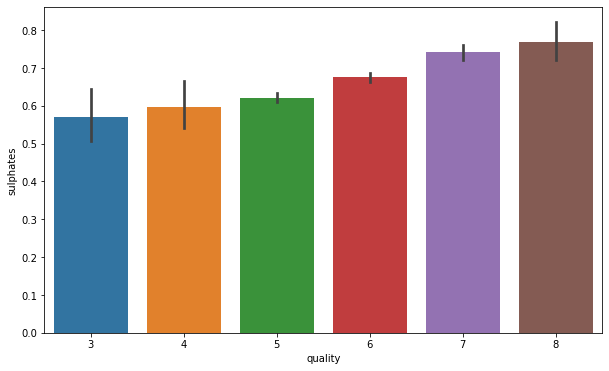

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="sulphates", data=wine)

There is slight upward trend observerd in the above plot

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

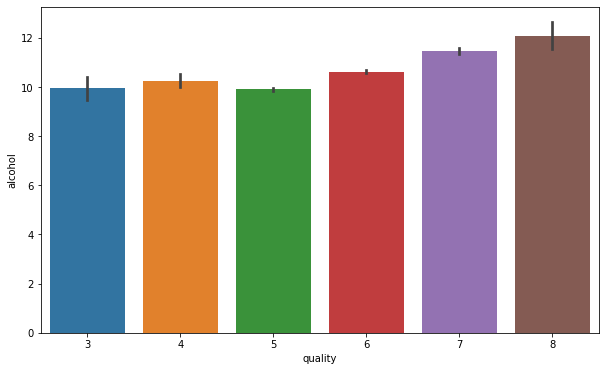

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y="alcohol", data=wine)

There is slight upward trend observerd in the above plot

From the above plots,
Downward trend is observed in fixed acidity,chlorides & ph values.
Upward trend is observed in citric acid,sulphates & alcohol values.

In [17]:
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

score value 3 has least count values = 10, 
score value 4 has second least count values = 53, 
score value 5 has highest observation count = 681, 
score value 6 has second highest value count = 638, 
score value 7 has 199 value counts.

Classifing the wine quality as good or bad depending on quality.
1. Bad or "0", if quality of wine lies in the range of (3,6).
2. Good or "1", if quality of wine lies in the range of (7,8). 

In [18]:
wine['quality']=wine['quality'].apply(lambda x: 1 if x> 6.5 else 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

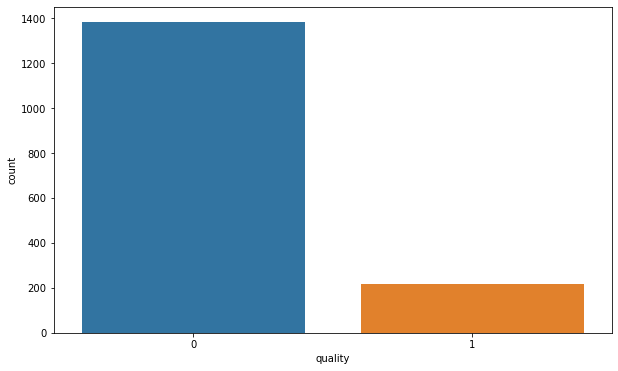

In [19]:
print(wine['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(wine['quality'])

Bad wine = 1382
Good wine =217

Outliers Detection

<AxesSubplot:>

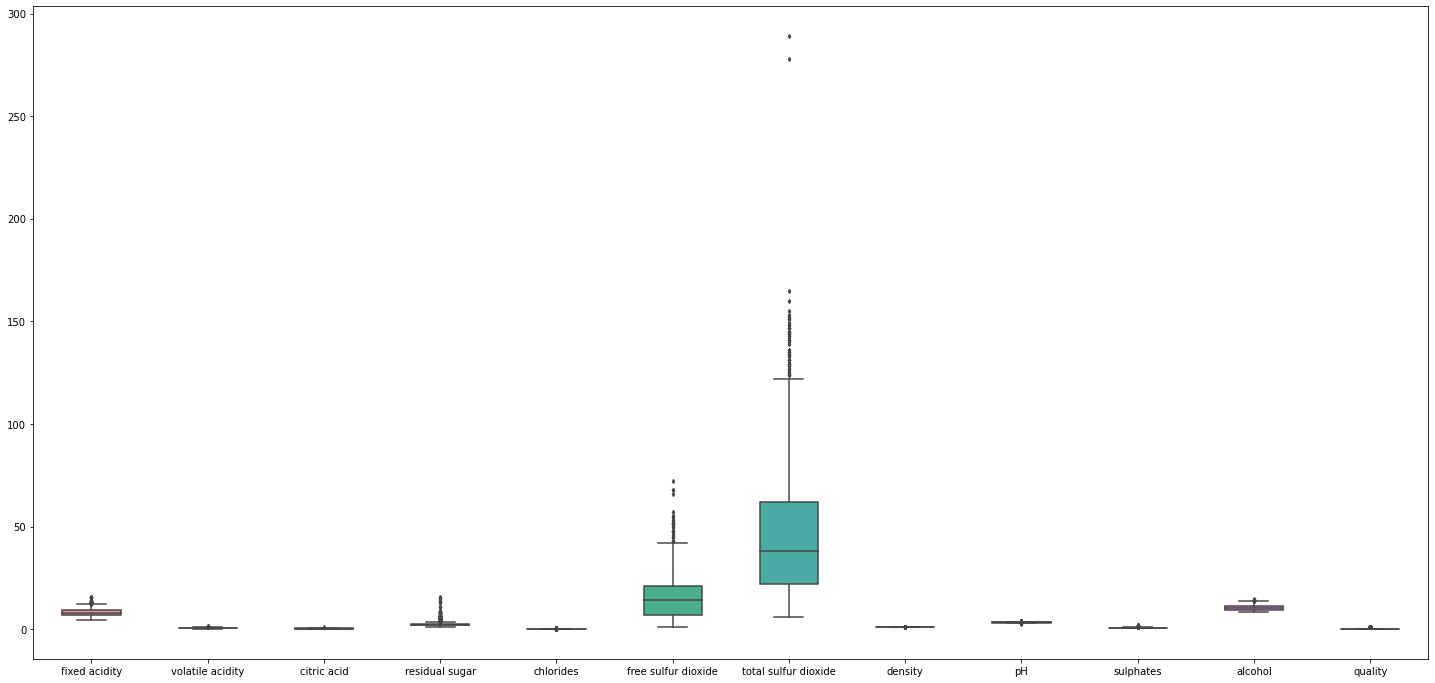

In [20]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

Free Sulphur Dioxide = Larger Value of Outliers Seen

Total Sulphur Dioxide = Outliers are Present

residual sugar = Outliers are present

fixed acidity = Outliers are present

# Correlation & HeatMap

In [21]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


density & fixed acidity is positive correlation with value of 0.66

citric acid & fixed acidity has positive correlation with value of 0.67

ph shows negative correlation with fixed acidty with value of -0.68

Total sulphur dioxide and free sulphur dioxide shows positive correlation with value of 0.66

<AxesSubplot:>

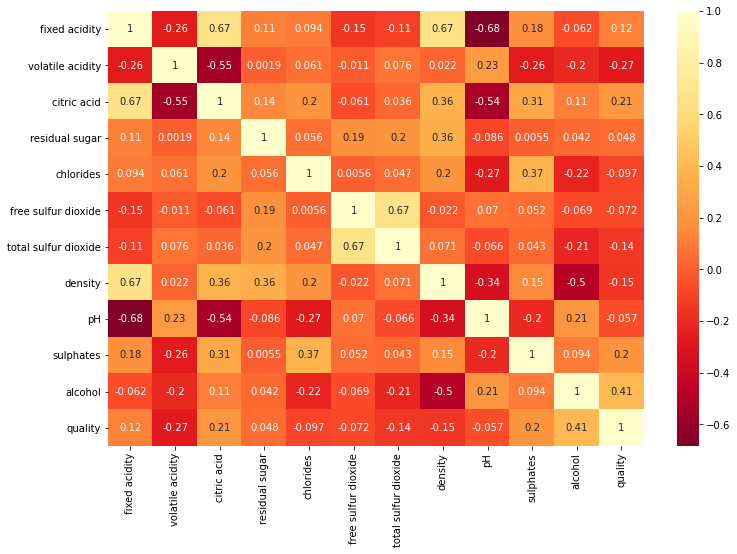

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

Target varaible (quality) shows positive correlation witrh alcohol with value of 0.43

Target shows Slight positive correlation with sulphates with value off 0.22

Target shows high negative correlation with volatile acidity

fixed acity has positive correlation with citric acid and density with value of 0.67

Density shows high negative correlation with alcohol

alcohol & quality has some positive correlation

free sulphur chloride shows some good correlation with total sulphur chloride

# Separating dependent and independent variable

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

-Dividing whole dataset in x & y dataset where y is the target variable

In [24]:
x.shape

(1599, 11)

In [25]:
y.shape

(1599,)

In [26]:
# x varibles without target variable
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Scaling the independent variables

In [27]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

# Decision tree classifier

In [28]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i) 

88.4469696969697 at random_state 0
87.12121212121212 at random_state 1
85.41666666666666 at random_state 2
85.79545454545455 at random_state 3
85.79545454545455 at random_state 4
87.5 at random_state 5
87.87878787878788 at random_state 6
86.36363636363636 at random_state 7
87.31060606060606 at random_state 8
85.60606060606061 at random_state 9
87.31060606060606 at random_state 10
87.12121212121212 at random_state 11
88.63636363636364 at random_state 12
85.60606060606061 at random_state 13
87.31060606060606 at random_state 14
85.41666666666666 at random_state 15
86.17424242424242 at random_state 16
88.06818181818183 at random_state 17
85.60606060606061 at random_state 18
85.22727272727273 at random_state 19
88.4469696969697 at random_state 20
84.0909090909091 at random_state 21
87.31060606060606 at random_state 22
86.5530303030303 at random_state 23
88.4469696969697 at random_state 24
87.12121212121212 at random_state 25
88.25757575757575 at random_state 26
88.4469696969697 at random_st

# Decision tree is configured to select best random state with high accuracy

In [29]:
maxA=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxA:
        maxA=acc
        maxRS=i
print("Best accuracy is ", maxA," on Random_state ",maxRS)

Best accuracy is  0.9020833333333333  on Random_state  4


# Splitting dataset x train, x test, y train y test

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [31]:
print("x-train shape: ", x_train.shape)
print("x-test shape: ", x_test.shape)
print("y-train shape: ", y_train.shape)
print("y-test shape: ", y_test.shape)

x-train shape:  (1279, 11)
x-test shape:  (320, 11)
y-train shape:  (1279,)
y-test shape:  (320,)


we have got 320 test values and 1279 train values.

# Creating ML Algorithm

# 1.  Logistic Regression

In [32]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
acc = classification_report(y_test, pred)
print(acc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



Logistic Regression is giving 87% Accuracy

# 2. Random Forest Classifier

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.73      0.47      0.57        47

    accuracy                           0.90       320
   macro avg       0.82      0.72      0.76       320
weighted avg       0.89      0.90      0.89       320



Random forest classifier is giving 90% acc

# 3. Support Vector Regressor

In [34]:
svc=SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support vector classifier is giving 88% acc

# 4. Knn Classifier

In [35]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



KNN is giving 88% accuracy

# Kfold Cross Validation

In [36]:
from sklearn.model_selection import KFold

In [37]:
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True) 

In [38]:
 # Logistic regression
print(cross_val_score(lg,x,y,cv=cross_validation).mean())

0.8761520376175549


In [39]:
 # RandomForestClassifier
print(cross_val_score(rf,x,y,cv=cross_validation).mean())

0.9093240595611286


In [40]:
 # Support Vector Regressor
print(cross_val_score(svc,x,y,cv=cross_validation).mean())

0.8861735893416928


In [41]:
 # KNeighborsClassifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean())

0.874292711598746


Random Forest believe to be the best model

# GridSearch CV

In [42]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

In [43]:
#Applying Gridsearch to best model random forest classifier
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

In [44]:
# Grid search CV applied to the Training Dataset
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [45]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

Best Parameter is selected from grid search CV which is

'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','n_estimators': 'best'

# Best Gridsearch parameter applied to best model

In [46]:
Final_mod = RandomForestClassifier(criterion = 'entropy', max_depth = 8,max_features='auto',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.375


Final Accuracy of the best model = 89.6875

# AUC ROC Curve

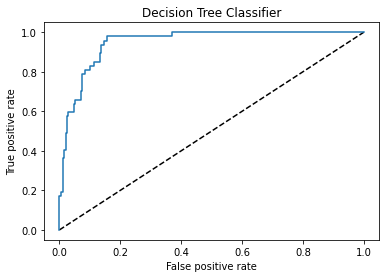

0.691138648585457

In [47]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

In above case the curve is closer to top left corner hence I believe the model will give better performance.

# Exporting Model file with joblib library

In [48]:
#Exporting ML Model as .pkl file with joblib library
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']